# Selecionar dois datasets (não triviais)

- Um dataset para classificação

- Um dataset para regressão
- Separar em treino/validação/teste
- Treinar modelos MLP para os dois problemas

## Considerar:

- Diferentes topologias (>=5 topologias, variar número de camadas
- Usar o algoritmo original SGD (não usar algoritmos otimizados, e.g. ADAM)
- Avaliar o impacto do uso do Momentum
- Avaliar o impacto do uso da regularização (i.e. L2)


# Ilustrar

- graficamente a evolução do treinamento (treino/validação).


# Confeccionar
- um relatório (reprodutível) contendo os experimentos e resultados


# Data set Regressão

O primeiro dataset tem por objetivo estimar o valor de uma variável utilizada nos processamento de sinais de queimada a variáevel em questão é para o cálculo de risco de fogo e então para este data set será utilizada a logíca de regressão para estimar o valor da variável FFMC a partir das demais variáveis e também colocando as coordenadas como entradas.o data set pode ser encontrado [neste link](https://archive.ics.uci.edu/dataset/162/forest+fires)



# Regressão

In [4]:
# Primeiro começaremos lendo o CSV e por isso até podemos criar uma funçào para ler csv já que será utilizada mais para frente


import csv

def ler_csv(caminho_arquivo):
    dados = []
    
    with open(caminho_arquivo, mode='r', newline='', encoding='utf-8') as arquivo_csv:
        leitor = csv.DictReader(arquivo_csv)
        
        for linha in leitor:
            dados.append(linha)
    
    return dados

caminho = 'forestfires.csv'  

dados_csv = ler_csv(caminho)
print(dados_csv[0])


{'X': '7', 'Y': '5', 'month': 'mar', 'day': 'fri', 'FFMC': '86.2', 'DMC': '26.2', 'DC': '94.3', 'ISI': '5.1', 'temp': '8.2', 'RH': '51', 'wind': '6.7', 'rain': '0', 'area': '0'}


In [5]:
import csv

def converter_mes(mes_abreviado):
    meses = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
        'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
        'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    return meses.get(mes_abreviado.lower(), 'Desconhecido')

def converter_dia(dia_abreviado):
    dias = {
        'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4,
        'fri': 5, 'sat': 6, 'sun': 7
    }
    return dias.get(dia_abreviado.lower(), 'Desconhecido')

def ler_csv(caminho_arquivo):
    dados = []
    
    with open(caminho_arquivo, mode='r', newline='', encoding='utf-8') as arquivo_csv:
        leitor = csv.DictReader(arquivo_csv)
        
        for linha in leitor:
            linha['month'] = converter_mes(linha['month'])
            linha['day'] = converter_dia(linha['day'])
            dados.append(linha)
    
    return dados


caminho = 'forestfires.csv' 
dados_csv = ler_csv(caminho)
print(dados_csv[0])


{'X': '7', 'Y': '5', 'month': 3, 'day': 5, 'FFMC': '86.2', 'DMC': '26.2', 'DC': '94.3', 'ISI': '5.1', 'temp': '8.2', 'RH': '51', 'wind': '6.7', 'rain': '0', 'area': '0'}


In [14]:
# vou agora separar em 70% dos valores para treino 20% para teste e 10 % para validação
total = int(len(dados_csv))
treinamento = int(len(dados_csv)*0.7)
validacao = int(len(dados_csv)*0.1)
teste = total -treinamento- validacao

print(f'para o treinamento seram {treinamento} tuplas já para validação {validacao} e para teste {teste} totalizando {treinamento+validacao+teste} tuplas')

para o treinamento seram 361 tuplas já para validação 51 e para teste 105 totalizando 517 tuplas


In [23]:
# vou fazer a permutação randomica de valores para poder selecionar somente os 70 porcento primeiros para treinament depois os 10 seguintes para validaçao e os 20 porcento finais para teste

import numpy as np

def permutar_dados(dados):
    dados = np.random.permutation(dados)
    return dados


dados_csv_permutados = permutar_dados(dados_csv)

print(dados_csv_permutados[0] == dados_csv[0])
print(dados_csv_permutados[0])
print(dados_csv[0])

dados_treinamento= []
dados_validação=[]
dados_teste=[]

dados_treinamento = dados_csv_permutados[:treinamento]
dados_validação = dados_csv_permutados[(treinamento +1 ):(treinamento +1 +validacao)]

dados_teste = dados_csv_permutados[(treinamento + 1 + validacao):]

print(f'dados de treinamento: {len(dados_treinamento)}, dados de validação: {len(dados_validação)} e dados de teste: {len(dados_teste)}')

False
{'X': '8', 'Y': '6', 'month': 8, 'day': 2, 'FFMC': '96.1', 'DMC': '181.1', 'DC': '671.2', 'ISI': '14.3', 'temp': '21.6', 'RH': '65', 'wind': '4.9', 'rain': '0.8', 'area': '0'}
{'X': '4', 'Y': '3', 'month': 9, 'day': 2, 'FFMC': '90.3', 'DMC': '80.7', 'DC': '730.2', 'ISI': '6.3', 'temp': '17.8', 'RH': '63', 'wind': '4.9', 'rain': '0', 'area': '0'}
dados de treinamento: 361, dados de validação: 51 e dados de teste: 104


In [68]:
print(dados_teste[0]['FFMC'])

primeiro_dicionario = dados_csv_permutados[0]
target = []
data= np.zeros((517,12))

for i, dicionario in enumerate(dados_csv_permutados): 
    for chave, valor in dicionario.items():
        if chave == 'FFMC':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            target.append(float_value)
        if chave=='X':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,0]= float_value
        if chave=='y':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,1]= float_value
        if chave=='month': 
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,2]= float_value
        if chave=='day':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,3]= float_value
        if chave=='DMC':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,4]= float_value
        if chave=='DC':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,5]= float_value
        if chave=='ISI':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,6]= float_value
        if chave=='temp':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,7]= float_value
        if chave=='RH':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,8]= float_value
        if chave=='wind':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,9]= float_value
        if chave=='rain':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,10]= float_value
        if chave=='area':
            print(f"{chave}: {valor}")
            float_value = float(valor)
            data[i,11]= float_value
        


93.7
X: 8
month: 8
day: 2
FFMC: 96.1
DMC: 181.1
DC: 671.2
ISI: 14.3
temp: 21.6
RH: 65
wind: 4.9
rain: 0.8
area: 0
X: 4
month: 3
day: 1
FFMC: 87.6
DMC: 52.2
DC: 103.8
ISI: 5
temp: 11
RH: 46
wind: 5.8
rain: 0
area: 0
X: 1
month: 8
day: 2
FFMC: 91
DMC: 121.2
DC: 561.6
ISI: 7
temp: 21.6
RH: 19
wind: 6.7
rain: 0
area: 0
X: 8
month: 8
day: 1
FFMC: 92.1
DMC: 207
DC: 672.6
ISI: 8.2
temp: 25.5
RH: 29
wind: 1.8
rain: 0
area: 1.23
X: 8
month: 8
day: 2
FFMC: 92.1
DMC: 152.6
DC: 658.2
ISI: 14.3
temp: 20.1
RH: 58
wind: 4.5
rain: 0
area: 9.27
X: 7
month: 8
day: 2
FFMC: 96.1
DMC: 181.1
DC: 671.2
ISI: 14.3
temp: 21.6
RH: 65
wind: 4.9
rain: 0.8
area: 0
X: 7
month: 9
day: 6
FFMC: 92.5
DMC: 88
DC: 698.6
ISI: 7.1
temp: 22.8
RH: 40
wind: 4
rain: 0
area: 0
X: 1
month: 9
day: 2
FFMC: 91
DMC: 129.5
DC: 692.6
ISI: 7
temp: 21.7
RH: 38
wind: 2.2
rain: 0
area: 0.43
X: 4
month: 8
day: 4
FFMC: 91.7
DMC: 114.3
DC: 661.3
ISI: 6.3
temp: 17.6
RH: 45
wind: 3.6
rain: 0
area: 0
X: 4
month: 8
day: 3
FFMC: 95.2
DMC: 217.7
DC

# Data save

Apos salvar os dados detnro da target e do data começar os treinamento e testes 

In [43]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [73]:
x= data
y = target

In [74]:
# Separando os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [97]:
# Modelo 1 com 30 neuronios e uma camada
model_0=MLPRegressor(
    hidden_layer_sizes=(30),
    activation='relu',
    batch_size='auto',
    solver='sgd',
    learning_rate_init=0.0001,
    alpha=0.,
    momentum=0.,
    early_stopping=False,
    max_iter=500,
    verbose=True
    )


In [98]:
# Ajustar o modelo aos dados e calcular a loss
treinamento_0 = model_0.fit(X_train_scaled, y_train)
train_loss_values_0 = treinamento_0.loss_curve_

Iteration 1, loss = 4037.83870232
Iteration 2, loss = 4030.93171683
Iteration 3, loss = 4024.00427484
Iteration 4, loss = 4017.04703590
Iteration 5, loss = 4010.05770592
Iteration 6, loss = 4003.01640215
Iteration 7, loss = 3995.93306571
Iteration 8, loss = 3988.78072960
Iteration 9, loss = 3981.55900999
Iteration 10, loss = 3974.27820425
Iteration 11, loss = 3966.92458996
Iteration 12, loss = 3959.52041558
Iteration 13, loss = 3952.02874705
Iteration 14, loss = 3944.44226779
Iteration 15, loss = 3936.77919439
Iteration 16, loss = 3929.02137959
Iteration 17, loss = 3921.15635207
Iteration 18, loss = 3913.18677936
Iteration 19, loss = 3905.13007797
Iteration 20, loss = 3896.97344142
Iteration 21, loss = 3888.67028958
Iteration 22, loss = 3880.25053640
Iteration 23, loss = 3871.70602395
Iteration 24, loss = 3863.02739004
Iteration 25, loss = 3854.20651764
Iteration 26, loss = 3845.28885936
Iteration 27, loss = 3836.19330786
Iteration 28, loss = 3826.96307578
Iteration 29, loss = 3817.571

/home/danielfarkat/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [99]:
# O mesmo modelo mas agora com momentum=0.9 e alpha=0.0001

# Modelo 1 com 8 neuronios na primeira camada
model_1=MLPRegressor(
    hidden_layer_sizes=(30),
    activation='relu',
    batch_size='auto',
    solver='sgd',
    learning_rate_init=0.0001,
    alpha=0.0001,
    momentum=0.9,
    early_stopping=False,
    max_iter=150,
    verbose=True
    )

In [100]:
# Ajustar o modelo aos dados e calcular a loss e o validation score
treinamento_1 = model_1.fit(X_train_scaled, y_train)
train_loss_values_1 = treinamento_1.loss_curve_

Iteration 1, loss = 4081.90103207
Iteration 2, loss = 4063.72010286
Iteration 3, loss = 4035.97791636
Iteration 4, loss = 4000.83062278
Iteration 5, loss = 3958.93254588
Iteration 6, loss = 3911.87204785
Iteration 7, loss = 3858.68671899
Iteration 8, loss = 3799.97542408
Iteration 9, loss = 3733.39967951
Iteration 10, loss = 3659.67697250
Iteration 11, loss = 3576.12555995
Iteration 12, loss = 3481.68462825
Iteration 13, loss = 3372.24145993
Iteration 14, loss = 3247.34650771
Iteration 15, loss = 3103.64987470
Iteration 16, loss = 2940.71644612
Iteration 17, loss = 2754.50097705
Iteration 18, loss = 2543.51692575
Iteration 19, loss = 2309.41104737
Iteration 20, loss = 2052.05545179
Iteration 21, loss = 1774.46664007
Iteration 22, loss = 1483.61863911
Iteration 23, loss = 1188.81302170
Iteration 24, loss = 903.06993602
Iteration 25, loss = 644.93250004
Iteration 26, loss = 420.66121214
Iteration 27, loss = 251.06898795
Iteration 28, loss = 136.51325402
Iteration 29, loss = 75.39223383
I

/home/danielfarkat/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


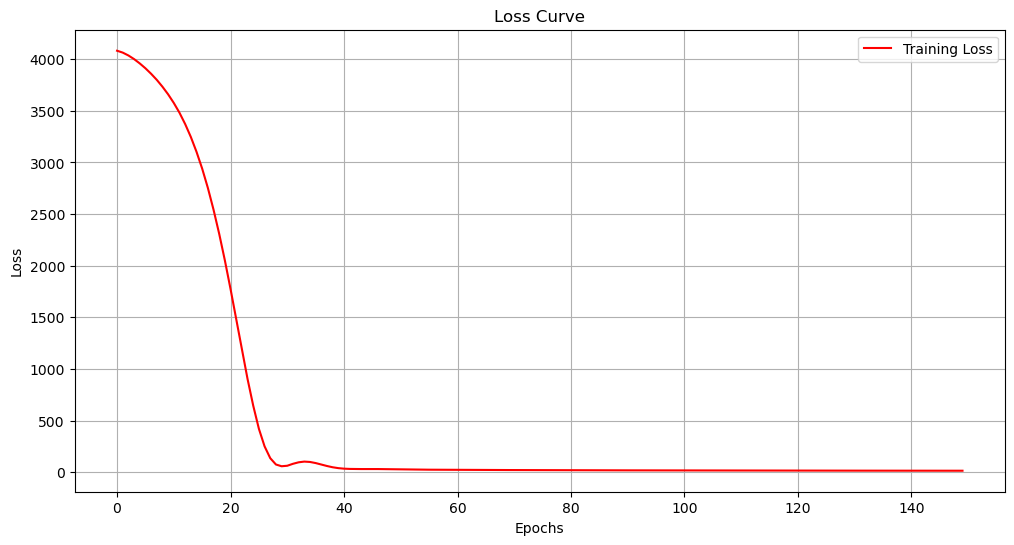

In [102]:
# Gráfico da curva da loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss_values_1, label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [103]:

predict_train_1 = model_1.predict(X_train_scaled)
predict_test_1 = model_1.predict(X_test_scaled)

In [104]:

test_set_rsquared_1 = model_1.score(X_train_scaled, y_train)
test_set_rmse_1 = np.sqrt(mean_squared_error(y_test, predict_test_1))

# Mostrar os valores para R^2 e RMSE
# O valor de R^2 pode ser negativo, um modelo que sempre retorna o valor
#esperado de y teria R^2=0. um modelo pior teria R^2 negativo.

print('R_squared value: ', test_set_rsquared_1)
print('RMSE: ', test_set_rmse_1)

R_squared value:  0.24992247423589375
RMSE:  3.922812420435802


# segundo modelo 

In [105]:
# Modelo 2 com duas camadas de 8 neuronios
model_2=MLPRegressor(
    hidden_layer_sizes=(30,30),
    activation='relu',
    batch_size='auto',
    solver='sgd',
    learning_rate_init=0.0001,
    alpha=0.,
    momentum=0.9,
    early_stopping=False,
    max_iter=1000,
    verbose=True
    )

In [106]:
treinamento_2 = model_2.fit(X_train_scaled, y_train)
train_loss_values_2 = treinamento_2.loss_curve_

Iteration 1, loss = 4084.92450679
Iteration 2, loss = 4060.50488749
Iteration 3, loss = 4022.34291234
Iteration 4, loss = 3969.71128420
Iteration 5, loss = 3899.48338855
Iteration 6, loss = 3804.90156699
Iteration 7, loss = 3672.62441943
Iteration 8, loss = 3479.08579844
Iteration 9, loss = 3194.81617759
Iteration 10, loss = 2767.96526544
Iteration 11, loss = 2140.83110431
Iteration 12, loss = 1303.29862432
Iteration 13, loss = 467.61490645
Iteration 14, loss = 175.45559626
Iteration 15, loss = 442.72621968
Iteration 16, loss = 437.48160194
Iteration 17, loss = 173.91971678
Iteration 18, loss = 64.24695902
Iteration 19, loss = 79.64988944
Iteration 20, loss = 103.77879447
Iteration 21, loss = 97.31406829
Iteration 22, loss = 72.39490775
Iteration 23, loss = 52.95136249
Iteration 24, loss = 47.20633384
Iteration 25, loss = 46.13979025
Iteration 26, loss = 42.68910241
Iteration 27, loss = 37.43368369
Iteration 28, loss = 34.10113084
Iteration 29, loss = 32.58050440
Iteration 30, loss = 3

/home/danielfarkat/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


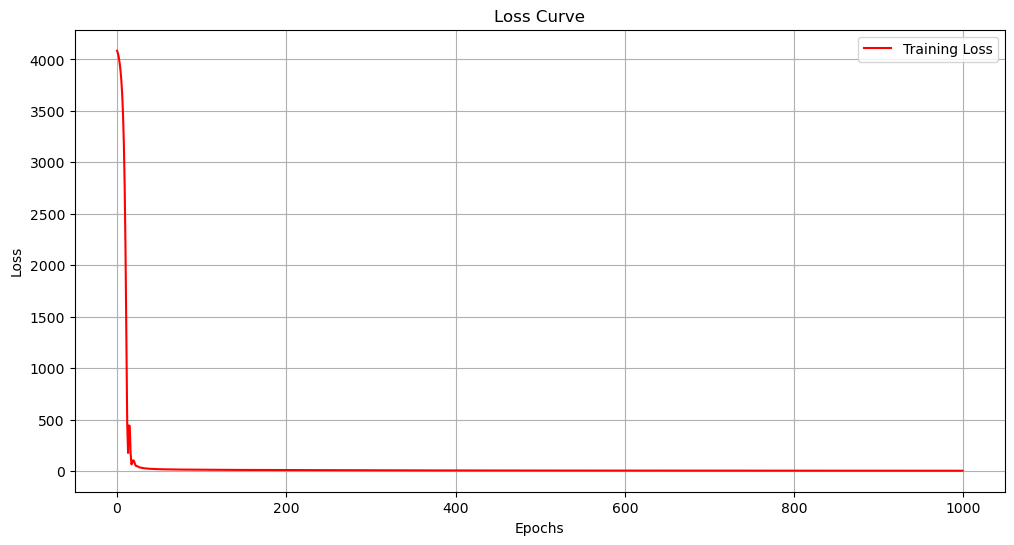

In [107]:
# Gráfico da curva da loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss_values_2, label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
predict_train_2 = model_2.predict(X_train_scaled)
predict_test_2 = model_2.predict(X_test_scaled)

In [109]:
test_set_rsquared_2 = model_2.score(X_test_scaled, y_test)
test_set_rmse_2 = np.sqrt(mean_squared_error(y_test, predict_test_2))

# Mostrar os valores para R^2 e RMSE
# O valor de R^2 pode ser negativo, um modelo que sempre retorna o valor
#esperado de y teria R^2=0. um modelo pior teria R^2 negativo.

print('R_squared value: ', test_set_rsquared_2)
print('RMSE: ', test_set_rmse_2)

R_squared value:  -0.8576715922852567
RMSE:  3.736091121342082
